In [1]:
#Reading The File
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('ex2data2.txt',names=['Test 1','Test 2','Accepted?'])
data.head(n=10)

,Test 1,Test 2,Accepted?
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


In [2]:
#Describing The Data
data.describe()

,Test 1,Test 2,Accepted?
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


Text(0,0.5,'Test 2')

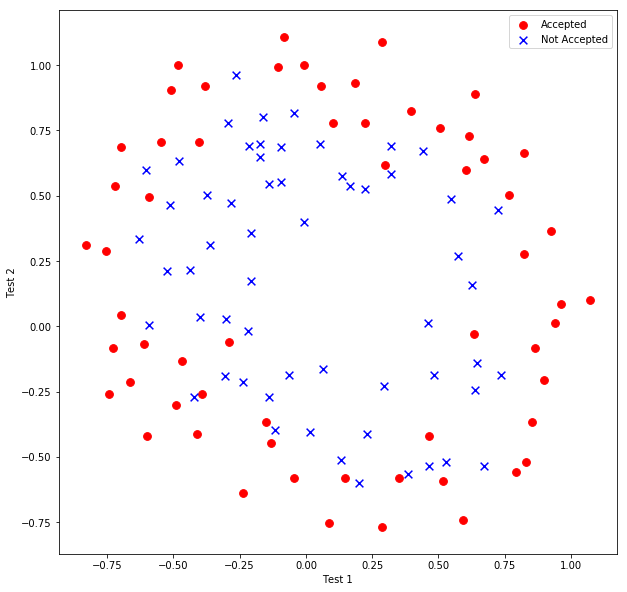

In [3]:
#Now Plotting The Data
accepted=data[data['Accepted?'].isin([0])]
notAccepted=data[data['Accepted?'].isin([1])]
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(accepted['Test 1'],accepted['Test 2'],s=60,c='r',marker='o',label='Accepted')
ax.scatter(notAccepted['Test 1'],notAccepted['Test 2'],s=60,c='b',marker='x',label='Not Accepted')
ax.legend()
ax.set_xlabel('Test 1')
ax.set_ylabel('Test 2')

In [4]:
#Now Taking The Individual Values
testOneScore=data['Test 1'].values
testTwoScore=data['Test 2'].values
isAccepted=data['Accepted?'].values
Y=np.array(isAccepted)
m=len(Y)
X0=np.ones(m)
X=np.array([X0,testOneScore,testTwoScore]).T
degree=6
#Increasing The Degree Of Our X Matrix
degree = 6
m, n = X.shape
for i in range(1, degree + 1):
    for j in range(i + 1):
        newX = (X ** (i - j)) * (X ** j)
theta=np.array([0,0,0])
#Took ALl The data

In [44]:
#Defining The Sigmoid and The CostFunc With Regularziation Term
def sigmoid(z):
    return (1/(1+np.exp(-z)))
def costCompute(newX,Y,theta,learnRate):
    alpha=0.0011
    iters=10000
    h=newX.dot(theta)
    first=np.multiply(-Y,np.log(sigmoid(h)))
    second=np.multiply((1-Y),np.log(1-sigmoid(h)))
    reg = (learnRate / 2 * m) * np.sum(np.power(theta, 2))
    res=np.sum((first-second)/m)+reg
    return res

In [45]:
costCompute(newX,Y,theta,1)


48.065445613169615

In [46]:
#Defining The Hypothesis and the gradient func
def gradientDescent(newX,Y,theta,learnRate,iters,alpha):
    learnRate=1
    costHistory=[0]*iters
    for iterations in range(iters):
        #Calculating The Hypothesis
        hypothesis=sigmoid(newX.dot(theta))
        #Error
        error=hypothesis-Y
        #The Gradient
        gradient=(X.T.dot(error))/m
        #new theta
        if iterations==1:
            theta=theta-alpha*gradient
        else:
            theta=theta-((alpha*gradient)+(learnRate/m*theta))
        #new cost func
        newCost=costCompute(newX,Y,theta,1)
        costHistory[iterations]=newCost
    return theta,costHistory

In [47]:
theta,cost=gradientDescent(newX,Y,theta,1,100000,0.8)
print(theta)
print(cost[-1])

[ 0.03374482 -0.89562359 -0.00685541]
48.065445613169615


In [48]:
#Accuracy Prediction
def predict(theta, newX):  
    probability = sigmoid(newX.dot(theta))
    return [1 if x >= 0.5 else 0 for x in probability]

predictions = predict(theta, newX)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print('accuracy = {0}%'.format(accuracy))  

accuracy = 78%


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
LogReg = LogisticRegression()
poly = PolynomialFeatures(6)
poly.fit_transform(newX)
LogReg.fit(newX, Y)
y_pred = LogReg.predict(newX)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)
confusion_matrix

array([[37, 23],
       [ 6, 52]], dtype=int64)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.62      0.72        60
          1       0.69      0.90      0.78        58

avg / total       0.78      0.75      0.75       118

